In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

vsigmoid = np.vectorize(sigmoid)

In [4]:
def sigmoid_descent(y):
    return sigmoid(y) * (1.0 - sigmoid(y))

dsigmoid = np.vectorize(sigmoid_descent)

In [5]:
class NeuralNetwork(object):
    def __init__(self, data, hidden, output):
        
        self.xx = data
        self.hh = hidden
        self.o = output
        self.b = 1
        self.loss = []
        
        # Create weight randomly
        self.w1 = np.random.randn(self.hh, self.xx)  # [64, 784]
        self.b1 = np.random.randn(self.hh)           # [64, 1]
        self.w2 = np.random.randn(self.o, self.hh)   # [10, 64]
        self.b2 = np.random.randn(self.o)            # [10, 1]
        
        # Create arrays to store changes
        self.w1c = np.zeros((self.hh, self.xx))
        self.b1c = np.zeros(self.hh)
        self.w2c = np.zeros((self.o, self.hh))
        self.b2c = np.zeros(self.o)
        
    def feed_forward(self, inputs):
        if len(inputs) == self.xx:
            self.x = np.array(inputs)
            self.z1 = np.dot(self.w1, self.x) + self.b1                            # z1 = w1*x + b1
            self.h  = vsigmoid(self.z1)                                            # h = sigmoid(z1)
            self.z2 = np.dot(self.w2, self.h) + self.b2                            # z2 = w2*h + b2
            self.yh = vsigmoid(self.z2)                                            # yh = sigmoid(z2)
        else:
            print("Dim of input is wrong")
        
    def back_prop(self, labels, rate):
        self.loss.append(sum((self.yh - labels)**2))

        self.dyh = 2*(self.yh - labels)                                            # dL/dyh = 2(yh - y)         [10, 1]
        self.dz2 = np.multiply(self.dyh, np.multiply(self.yh, 1-self.yh))          # dL/dz2 = (dL/dyh)(dyh/dz2) [64, 1]
        self.dw2 = np.dot(self.dz2.reshape(self.o,1), self.h.reshape(self.hh,1).T) # dL/dw2 = (dL/dz2)(dz2/dw2) [10, 64]
        self.db2 = self.dz2                                                        # dL/db2 = (dL/dz2)(dz2/db2) [10, 1]
        self.dh  = np.dot(self.w2.T, self.dz2)                                     # dL/dh  = (dL/dz2)(dz2/dh)  [64, 1]
        self.dz1 = np.multiply(self.dh, dsigmoid(self.z1))                         # dL/dz1 = (dL/dh)(dh/dz1)   [64, 1]
        self.dw1 = np.dot(self.dz1.reshape(self.hh,1), self.x.reshape(self.xx,1).T)# dL/dw1 = (dL/dz1)(dz1/dh)  [64, 784]
        self.db1 = self.dz1                                                        # dL/db1 = (dL/dz1)(dz1/db1) [784, 1]

        self.w1 -= rate*self.dw1
        self.b1 -= rate*self.db1
        self.w2 -= rate*self.dw2
        self.b2 -= rate*self.db2

## Load Data 

In [6]:
data=np.float64(np.load('MNIST.npy'))
labels=np.float32(np.load('MNIST_labels.npy'))
n=len(data)
p=len(data[0])
for i in range(0,n):
    data[i]=data[i]/255      # The value lie in [0,1]
print (data.shape)

(70000, 784)


In [7]:
# Divide the data into Training, Develop and Test

Train=[]
Test=[]
TrainLabel=[]
TestLabel=[]

for i in range(0,n):
    rn=np.random.choice(range(1,11),1)[0]
    if rn <= 8:
        Train.append(data[i])
        temp = np.insert(np.zeros(9),int(labels[i]),1)
        TrainLabel.append(temp)
    else:
        Test.append(data[i])
        TestLabel.append(labels[i])

In [8]:
a=len(Train)
c=len(Test)

print("The number of data in Training : ",a,"(",round(a/n*100,2),")%")
print("The number of data in Test     : ",c,"(",round(c/n*100,2),")%")

The number of data in Training :  56128 ( 80.18 )%
The number of data in Test     :  13872 ( 19.82 )%


## Train the NN 

In [16]:
epochs = 1
learning = 0.001
hidden_no = 128

NN1 = NeuralNetwork(data.shape[1], hidden_no, 10)

for i in range(epochs):
    #print("Epoch",i, "...")
    for i in range(len(Train)):              # Stochastic Gradient Descent
        NN1.feed_forward(Train[i])
        NN1.back_prop(TrainLabel[i],learning)

## Result

In [17]:
Pred = []

for i in range(len(Test)):
    NN1.feed_forward(Test[i])
    Pred.append(np.argmax(NN1.yh))

Text(0.5,1,'Loss per update')

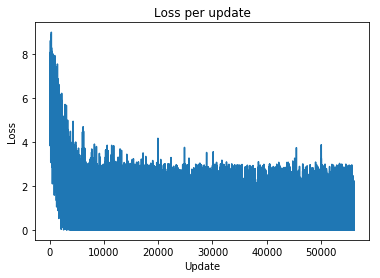

In [18]:
plt.plot(NN1.loss)
plt.xlabel('Update')
plt.ylabel('Loss')
plt.title('Loss per update')

In [19]:
Error = 0.0
for i in range(len(Test)):
    if TestLabel[i]==Pred[i]:
        Error += 1
print(Error/len(Test))

0.08657727797001154


Error rate is about 8.6%. 